### 레이다 차트(Radar Chart) 그리기
>
 - Spider Plot 이라고도 함
 - 어떤 측정 목표(예제에서는 카테고리)에 대한 평가항목(예제에서는 그룹)이 여러 개일 때 사용 : 비교평가를 시각적으로 볼 수 있도록 함
 - 항목 수에 따라 원을 같은 간격으로 나누고, 중심으로부터 일정 간격으로 동심으로 척도를 재는 칸을 나누어 표시
 - 각 평가항목의 정량화된 점수에 따라 그 위치에 점을 찍고 평가항목간 점을 이어 선으로 만들어 항목 간 균형을 한눈에 볼 수 있도록 해줌
 - 여러 측정 목표를 함께 겹쳐 놓아 비교하기에도 편리함
 - 각 항목 간 비율뿐만 아니라 균형과 경향을 직관적으로 알 수 있음

In [10]:
# 라이브러리 설정
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# 한글폰트
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name  = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

### Basic radar chart

In [11]:
# 데이터 프레임 준비
df = pd.DataFrame({
'group': ['전사','궁수','법사','도둑'],
'체력': [38, 1.5, 30, 4],
'지능': [29, 10, 9, 34],
'민첩': [8, 39, 23, 24],
'피': [7, 31, 33, 14],
'마나': [28, 15, 32, 14]
})

df

,group,체력,지능,민첩,피,마나
0,전사,38.0,29,8,7,28
1,궁수,1.5,10,39,31,15
2,법사,30.0,9,23,33,32
3,도둑,4.0,34,24,14,14


In [12]:
# 척도 카테고리 추출
categories=list(df)[1:]

# 변수 개수 설정 : N
N = len(categories)

# 확인
print(categories)
print(N)

['체력', '지능', '민첩', '피', '마나']
5


In [13]:
# 데이터 프레임의 첫번째 라인만 그려보기
values=df.loc[0].drop('group').values.flatten().tolist() #그룹을 삭제->다차원 배열->1차원배열->리스트
print(values)

# 닫힌 형태로 만들기 위해 처음 값을 부가적으로 추가
values += values[:1]
print(values)

[38.0, 29, 8, 7, 28]
[38.0, 29, 8, 7, 28, 38.0]


In [14]:
# N개 척도(카테고리)에 대해 원을 균등 분할 :  plot수 / N
angles = [n / float(N) * 2 * pi for n in range(N)]
print(angles)

# 닫힌 형태로 만듬
angles += angles[:1] 
print(angles)

[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]


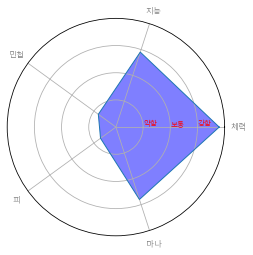

In [15]:
# spider plot 초기화
ax = plt.subplot(111, polar=True)
 
# 변수당 축을 그리고 라벨(카테고리 이름) 부여 : x축에 해당하는 ...
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# ylabel들을 그림 : y축에 해당하는...
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["약함","보통","강함"], color="red", size=7)
plt.ylim(0,40)
 
# 데이터를 그리고(선)
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# 다각형으로 표현된 내부를 채움
ax.fill(angles, values, 'b', alpha=0.5)

# 그림 그리기
plt.show()


### 여러 대상을 한 Radar chart로 표현

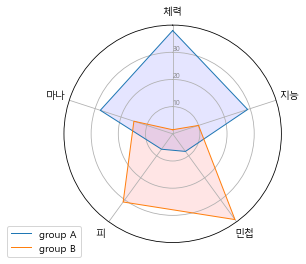

In [16]:
# ------- PART 1: 배경 생성하기
 
# 척도 카테고리 추출하고 변수 개수 N 설정
categories=list(df)[1:]
N = len(categories)
 
# N개의 각 축에 대한 척도(카테고리)에 대해 원을 균등 분할 :  plot수 / N
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# 초기화
ax = plt.subplot(111, polar=True)
 
# 첫 축을 맨 위로 놓기
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# x축 그리고 라벨 설정
plt.xticks(angles[:-1], categories)
 
# y축 라벨 설정
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

# ------- PART 2: Add plots
 
# 각 카테고리 데이터에 대한 선 그리기
# 일반적으로 3개 이상 그리면 차트를 읽기 힘들어지므로 2개만 그려봄, 두 개를 하나의 차트에서 비교하기 위함
 
# A 그룹에 대한 그림
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="전사")
ax.fill(angles, values, 'b', alpha=0.1)
 
# B 그룹에 대한 그림
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="궁수")
ax.fill(angles, values, 'r', alpha=0.1)
 
# 범례 추가
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# 그림 그리기
plt.show()

### facet을 사용한 Radar chart

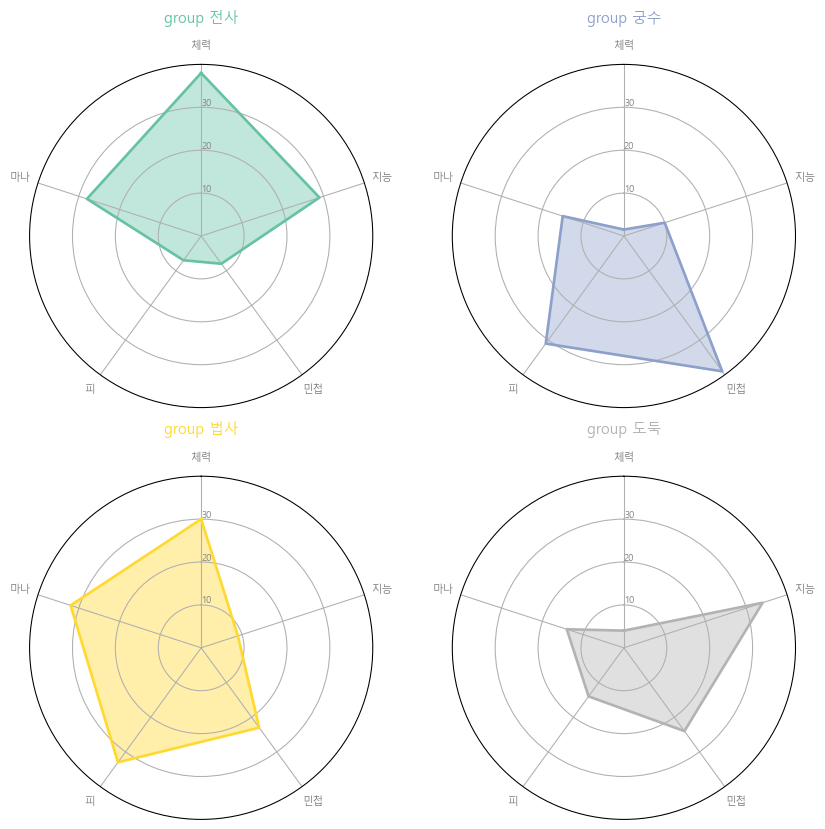

In [17]:
# ------- PART 1: 하나의 데이터 셋에 대한 선을 그려주는 함수 정의
 
def make_spider( row, title, color):
 
    # 척도 카테고리 추출하고 변수 개수 N 설정
    categories=list(df)[1:]
    N = len(categories)
    
    # N개의 각 축에 대한 척도(카테고리)에 대해 원을 균등 분할 :  plot수 / N
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # 서브 플롯 위치 잡기 : 2*2의 서브 플롯에서 row+1의 위치를 선택
    ax = plt.subplot(2,2,row+1, polar=True, )
    
    # 첫 축을 맨 위로 설정
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # x축에 대해 변수(카테고리)당 하나의 선과 라벨 부여
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # y축 라벨 부여
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)
    
    # 데이터에 대해 플롯 생성
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # 타이틀 추가
    plt.title(title, size=11, color=color, y=1.1)
 
# ------- PART 2: 각 facet에 대해 적용
# 그림판 초기화
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# 각 sub plot에 적용할 컬러 팔레트 생성
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# 반복해서 전체에 대한 각 facet의 sub plot 그리기
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))
